In [1]:
X = [] #Position in image
TX =[] #Robot arm belief position (forward kinematics)
Y = [] #sev (shoulder, elbow, wrist)

import json
with open("robotArmDataSet.json", "rb") as fp:
    jsonContent = json.load(fp)

    
    X = jsonContent[0]
    TX = jsonContent[1]
    Y = jsonContent[2]

In [2]:

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

trainInput, testInput, trainOutput, testOutput = train_test_split(X, Y, test_size=0.4, random_state= 0)

pls2 = PLSRegression(n_components=2)
pls2.fit(trainInput, trainOutput)

s = pls2.score(testInput, testOutput)

print(s)
Y_pred = pls2.predict(X)

params = pls2.get_params(True)


#print(Y)
#print(Y_pred)


0.3850952974025558


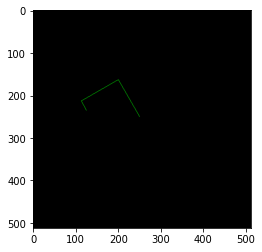

In [31]:
from RobotArmView import RobotArmView
from FakeKit import FakeKit
from RobotArm import RobotArm



fake = FakeKit()
b = RobotArm(fake)
b.Wrist(10)
rv = RobotArmView(b)

b.setState(RobotArm.ROTATE_NORMAL, 45.0, 90.0, 0.0, 0)

rv.draw()
rv.show()

[4.194318501454331, 9.223606445571065, 1.091854525266586, 3.7490837063148073, 16.74139764989509, 0.7961080709252323, 2.066541194871991, 12.235293216294865, 5.070667708315341, 4.490963354550087, 3.251835860753387, 4.9601359260712155, 8.340372218778247, 1.8528063228756775, 6.4593197049152895, 2.566608424451818, 2.0656506511247716, 2.1906333600519337, 3.384587317969182, 4.534274193080416, 7.10888499325023, 7.622409366498412, 10.544205344559717, 8.617022192146075, 14.631466588313732, 10.440941123485189, 7.933334524073541, 2.061361036520697, 10.742042651994774, 15.314741035857619, 2.663562804830538, 3.2266790155871603, 3.679821826556724, 5.259866171509787, 4.856900914343717, 3.013374038737392, 8.847279747123167, 3.2013811699716017, 10.02632336037349, 13.886889886537153, 2.8858801709003736, 12.580948050913983, 4.675613193909594, 6.285358809424615, 18.4887729269237, 1.7133999167318534, 4.273497945686777, 4.949318550600495, 12.290476390344898, 7.100139222579808, 3.2377295104477963, 8.774667940

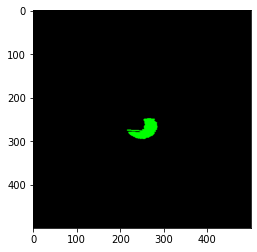

In [7]:
YPT = []
errors = []

import math 
import numpy as np
import cv2
from matplotlib import pyplot as plt


fake = FakeKit()
b = RobotArm(fake)
rv = RobotArmView(b)
i = 0

errorImage = np.zeros((500,500,3), np.uint8)
color = (0, 255, 0)

for yp in Y_pred:
    s= float(yp[0])
    e= float(yp[1])
    w= float(yp[2])

    b.setState(RobotArm.ROTATE_NORMAL, s,e,w, 0)

    ypt = [b.wristBone.getPos().x, b.wristBone.getPos().y]
    YPT.append(ypt)

    pt1 = (int(250+TX[i][0]),   int(250+TX[i][1]))
    pt2 = (int(250+YPT[i][0]), int(250+YPT[i][1]))
    cv2.line(errorImage, pt1, pt2, color, 2)
    rv.draw()


    xdiff = TX[i][0] - YPT[i][0]
    ydiff = TX[i][1] - YPT[i][1]
    error = math.sqrt(xdiff * xdiff + ydiff * ydiff)

    errors.append(error)
    i += 1

#plt.imshow(errorImage)


print(errors)

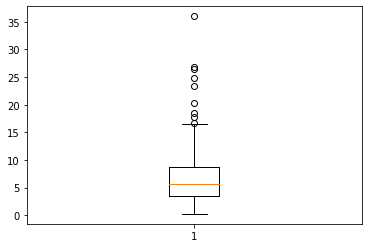

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(errors)
 
# To show the plot
plt.show()